### Reading:
1. Skim [this page](https://scikit-learn.org/stable/modules/clustering.html) to get an intuition for how clustering works. 
2. Study The first figure in Section 2.3.1 closely. Notice how different algorithms fit different datsets.

### Clustering with California Housing Dataset
- NOTE: Due to some randomness your results may differ slightly. Especially the color of the graphs. 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [2]:
housing_dataset = fetch_california_housing() # get dataset

print(help(fetch_california_housing)) #NOTE: Housing prices are in units of 100,000. 

Help on function fetch_california_housing in module sklearn.datasets._california_housing:

fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
    Load the California housing dataset (regression).
    
    ==============   ==============
    Samples total             20640
    Dimensionality                8
    Features                   real
    Target           real 0.15 - 5.
    ==============   ==============
    
    Read more in the :ref:`User Guide <california_housing_dataset>`.
    
    Parameters
    ----------
    data_home : optional, default: None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    download_if_missing : optional, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    
    return_X_y : bool

In [3]:
# create dataframe
housing_df = pd.DataFrame(housing_dataset.data, columns=housing_dataset.feature_names)

In [4]:
# set target variable
housing_df['MedHouseVal'] = housing_dataset.target

In [5]:
# look at our df
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Inspect the dataset. 
1. Inspect the data and take time to get familiar with this dataset.
2. Describe the data(use built-in functions to describe the data). 
    - Min/max, median etc...
3. Make a few plots to get familiar with the data. 

In [6]:
display(housing_df.info())

display(housing_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


None

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Make a scatter plot 
- Use the lats and lons to make a scatter plot. 
- The resulting graph should look roughly like California. 

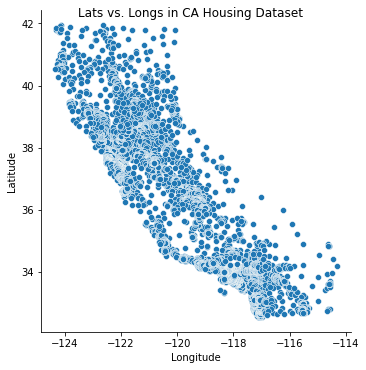

In [13]:
g = sns.relplot(x='Longitude',
            y='Latitude',
           data=housing_df,
           kind='scatter')

g.fig.suptitle("Lats vs. Longs in CA Housing Dataset")
plt.show()

### Cluster the data
1. Using only the lats and lons we will create clusters. 
2. Create a new `lat_lon_df` that has only lats and lons.
3. Using the `sklearn` library import the `KMeans` model. 
4. Create a `kmeans` variable with `KMeans` and set `n_clusters` = 2
5. Fit the `kmeans` model to the `lat_lon_df`
6. Call `.predict` on the model using `lat_lon_df` as our `X` value. **Note:** we are predicting on teh same thing we just clustered. 

In [16]:
lat_lon_df = housing_df[["Latitude", "Longitude"]]
display(lat_lon_df)

,Latitude,Longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25
...,...,...
20635,39.48,-121.09
20636,39.49,-121.21
20637,39.43,-121.22
20638,39.43,-121.32


In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

kmeans.fit(lat_lon_df)
kmeans.predict(lat_lon_df)

array([0, 0, 0, ..., 0, 0, 0])

### See the Centroids

Since the k value was set to 2, we will have two centroids which can be viewed using the `.cluster_centers_` attribute.

1. print the centroid values
2. print the labels using `kmeans.labels_`
3. createa  variable called `clust2` that holds `kmeans.labels_`.
3. Create a set on the labels to view all unique labels. 

In [24]:
display(kmeans.cluster_centers_)
display(kmeans.labels_)

array([[  37.95483333, -121.71523908],
       [  33.93924372, -118.00637521]])

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
clust2 = list(kmeans.labels_)
set(kmeans.labels_)

{0, 1}

### Plot the clustered dataset
1. Add a column called `clust2` to the `lat_lon_df`.
2. Set the `reg2` column to `reg2` variable. 
3. You may get a warning but it's ok. 
4. Display the `lat_lon_df`. You should have 3 columns. Lat/Lon/reg2. 
5. Create a scatterplot of the 2 clustered regions. 
6. Optional: See if you can get the warning to go away. 
7. Optional: Change the value of `n_clusters` and rerun the notebook. Be sure to change it back to 2!

In [28]:
lat_lon_df['clust2'] = clust2

<ipython-input-28-4f4e33603a81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_lon_df['clust2'] = clust2


In [29]:
display(lat_lon_df)

,Latitude,Longitude,clust2
0,37.88,-122.23,0
1,37.86,-122.22,0
2,37.85,-122.24,0
3,37.85,-122.25,0
4,37.85,-122.25,0
...,...,...,...
20635,39.48,-121.09,0
20636,39.49,-121.21,0
20637,39.43,-121.22,0
20638,39.43,-121.32,0


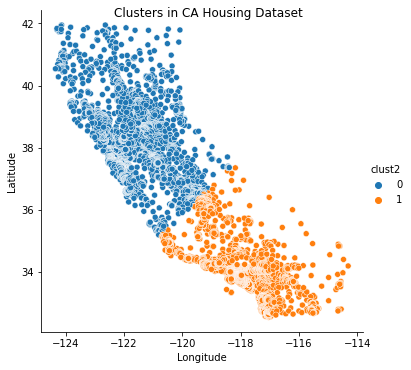

In [32]:
c = sns.relplot(x='Longitude',
                y='Latitude', 
                data=lat_lon_df, 
                kind='scatter', 
                hue='clust2')

c.fig.suptitle("Clusters in CA Housing Dataset")
plt.show()

### Split original df based on our clustering
1. Set column `reg2` in `housing_df` equal to `lat_lon_df['reg2']
2. Display the dataframe. 
3. Create a new df called `so_cal_df` that only has the blocks in southern California (reg2 with a value of 1). 
3. Create a new df called `no_cal_df` that only has the blocks in norther California (reg2 with a value of 0).
4. Plot the lats and lons of `so_cal_df` and `no_cal_df`.

In [34]:
housing_df['clust2'] = lat_lon_df['clust2']
display(housing_df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,clust2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0


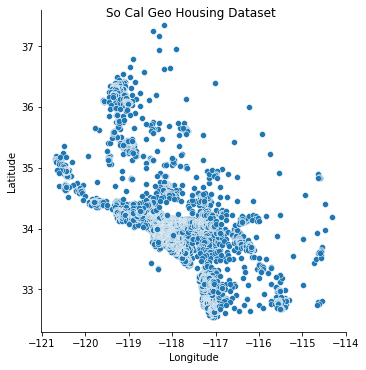

In [41]:
so_cal_df = housing_df[housing_df['clust2'] == 1]

scal_plot = sns.relplot(x='Longitude',
                       y='Latitude',
                       data=so_cal_df,
                       kind='scatter')
scal_plot.fig.suptitle("So Cal Geo Housing Dataset")
plt.show()

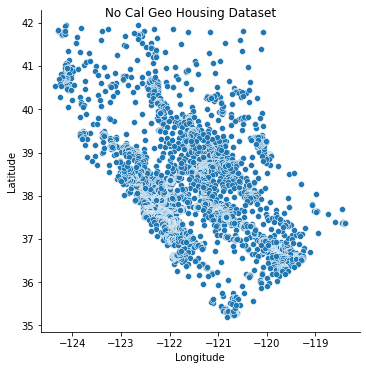

In [42]:
no_cal_df = housing_df[housing_df['clust2'] == 0]

ncal_plot = sns.relplot(x='Longitude',
                       y='Latitude',
                       data=no_cal_df,
                       kind='scatter')
ncal_plot.fig.suptitle("No Cal Geo Housing Dataset")
plt.show()

### Calculate the median house values
1. Calculate for `no_cal_df` and `so_cal_df`.

In [54]:
print("The median value for a house in Northern California is: " + str(no_cal_df['MedHouseVal'].median() * 100000))

print("The median value for a house in Southern California is: " + str(so_cal_df['MedHouseVal'].median() * 100000))

The median value for a house in Northern California is: 165500.0
The median value for a house in Southern California is: 185800.0


### Since `so_cal_df` has a higher median house value let's work with it. 
1. Create a new cluster model on the `so_cal_df` using only `MedHouseVal` and a cluster size of 3. 
2. Plot `so_cal_df` with the 3 clusters based on `MedHouseVal`.
3. Calculate the median `MedHouseVal` for each cluster. 

In [56]:
clust3 = np.array(so_cal_df['MedHouseVal']).reshape(-1,1)

kmeans = KMeans(n_clusters=3)

kmeans.fit(clust3)
kmeans.predict(clust3)

hi_med_lo = kmeans.labels_

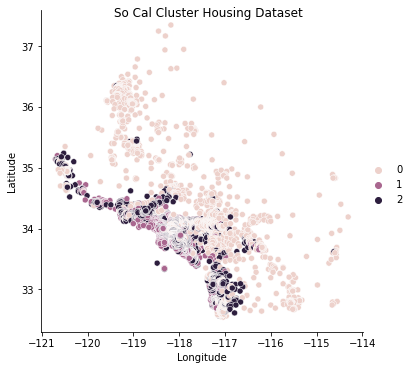

In [57]:
scal_clust = sns.relplot(x='Longitude',
                       y='Latitude',
                       data=so_cal_df,
                       kind='scatter',
                        hue=hi_med_lo)
scal_clust.fig.suptitle("So Cal Cluster Housing Dataset")
plt.show()

In [59]:
so_cal_df['hi_med_lo'] = hi_med_lo

<ipython-input-59-8c6bada43c5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_cal_df['hi_med_lo'] = hi_med_lo


In [60]:
print(f"Clust 0 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==0].median()}")
print(f"Clust 1 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==1].median()}")
print(f"Clust 2 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==2].median()}")

Clust 0 median house value: 1.388
Clust 1 median house value: 4.5
Clust 2 median house value: 2.417


### Create Clusters from the full dataset
1. Using the original dataset (without any of our cluster columns) create a KMeans model. 
2. Plot the resulting clusters. 
3. Change the number of clusters and rerun the notebook. 
4. Note: I don't see any obvious pattern in these clusters. Do you? 

In [64]:
housing_df.head()

og_housing_df = housing_df.drop(columns='clust2')

og_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(og_housing_df)
kmeans.predict(og_housing_df)
labels = kmeans.labels_

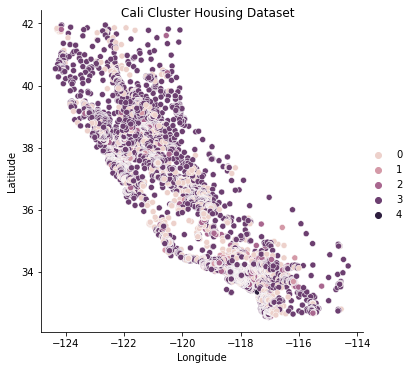

In [66]:
cal_clust = sns.relplot(x='Longitude',
                       y='Latitude',
                       data=og_housing_df,
                       kind='scatter',
                        hue=labels)
cal_clust.fig.suptitle("Cali Cluster Housing Dataset")
plt.show()

## Optional:
1. Explore other clustering algorithms. 
2. Cluster based on other features and plot them. 
